In [5]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['axes.grid'] = True

In [6]:
# Create a grid
x0 = 0
dx=0.01
L = 1
r = 1
Npoints = int(L/dx)

x = []
for i in range(0,Npoints):
    x_ = x0 + i*dx
    x.append(x_)

[(0.0, 1.0), (-0.1, 0.1), Text(0.5, 0, 'x'), Text(0, 0.5, 'Y')]

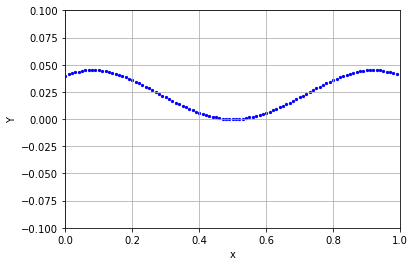

In [7]:
fold=[]
fnow=[]
fnew=[]

A=0.04
for i in range(len(x)):
    fold.append(A*math.sin(1*math.pi*x[i])+A*math.sin(2*math.pi*x[i]+math.pi/2))
    fnow.append(A*math.sin(1*math.pi*x[i])+A*math.sin(2*math.pi*x[i]+math.pi/2))
    fnew.append(A*math.sin(1*math.pi*x[i])+A*math.sin(2*math.pi*x[i]+math.pi/2))

    
fig, ax = plt.subplots()
scat = ax.scatter(x, fnow, c="b", s=5)
ax.set(xlim=[0, 1.0], ylim=[-0.1, 0.1], xlabel='x', ylabel='Y')

In [8]:
def update(frame):
    # for each frame, update the data stored on each artist.
    global y
    for i in range(1, len(x)-1):
        fnew[i]=2*fnow[i]-fold[i]+r**2*(fnow[i+1]+fnow[i-1]-2*fnow[i])
    # update old
    for i in range(1, len(x)-1):
        fold[i]=fnow[i]
    # update now
    for i in range(1, len(x)-1):
        fnow[i]=fnew[i]
        
    # update the scatter plot:
    data = np.stack([x, fnew]).T
    scat.set_offsets(data)
    return scat

ani = animation.FuncAnimation(fig=fig, func=update, frames=200, interval=10)
#plt.show()

from IPython.display import HTML
HTML(ani.to_jshtml())
